# 🏠 Housing Prices 🏠
## 3. Models &mdash; Trees and Forests

In [53]:
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import Image, display_svg, SVG
import seaborn as sns
import dtreeviz
# from fastbook import draw_tree

pd.options.display.max_rows = 40
pd.options.display.max_columns = 40


In [3]:
df = pd.read_csv('../input/home-data-for-ml-course/train.csv')
dft = pd.read_csv('../input/home-data-for-ml-course/test.csv')

In [4]:
columns = df.columns.tolist()

nan_row = {col: np.nan for col in columns}

# Convert to DataFrame
df_nan = pd.DataFrame([nan_row])
df_nan

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = pd.concat([df,df_nan]).reset_index(drop=True)

In [6]:
df= df.drop(columns=['Id'])

In [7]:
df.loc[df.YrSold.isna(),'YrSold'] = 2008.

In [8]:
dep_var = 'SalePrice'
df[dep_var] = np.log(df[dep_var])

<Axes: xlabel='YrSold', ylabel='count'>

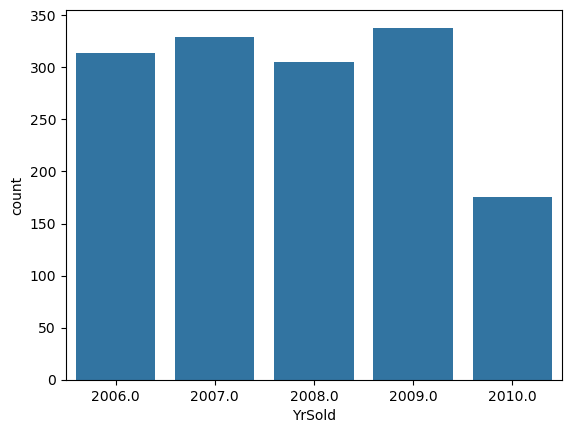

In [20]:
sns.countplot(df, x='YrSold')

In [21]:
cond = (df.YrSold<2010)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]
# 
splits = (list(train_idx),list(valid_idx))

In [22]:
procs = [Categorify, FillMissing]
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

/home/ian/micromamba/envs/dataphilly/lib/python3.12/site-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)
/home/ian/micromamba/envs/dataphilly/lib/python3.12/site-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

In [23]:
to.items

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GrLivArea_na,BsmtFullBath_na,BsmtHalfBath_na,FullBath_na,HalfBath_na,BedroomAbvGr_na,KitchenAbvGr_na,TotRmsAbvGrd_na,Fireplaces_na,GarageYrBlt_na,GarageCars_na,GarageArea_na,WoodDeckSF_na,OpenPorchSF_na,EnclosedPorch_na,3SsnPorch_na,ScreenPorch_na,PoolArea_na,MiscVal_na,MoSold_na
0,60.0,4,65.0,8450.0,2,0,4,4,1,5,1,6,3,3,1,6,7.0,5.0,2003.0,2003.0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,20.0,4,80.0,9600.0,2,0,4,4,1,3,1,25,2,3,1,3,6.0,8.0,1976.0,1976.0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,60.0,4,68.0,11250.0,2,0,1,4,1,5,1,6,3,3,1,6,7.0,5.0,2001.0,2002.0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,70.0,4,60.0,9550.0,2,0,1,4,1,1,1,7,3,3,1,6,7.0,5.0,1915.0,1970.0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,60.0,4,84.0,14260.0,2,0,1,4,1,3,1,16,3,3,1,6,8.0,5.0,2000.0,2000.0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,20.0,5,90.0,7407.0,2,0,4,4,1,5,1,18,1,3,1,3,6.0,7.0,1957.0,1996.0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1446,20.0,4,69.0,26142.0,2,0,1,4,1,2,1,12,3,3,1,3,5.0,7.0,1962.0,1962.0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1456,20.0,4,85.0,13175.0,2,0,4,4,1,5,1,15,3,3,1,3,6.0,6.0,1978.0,1988.0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1457,70.0,4,66.0,9042.0,2,0,4,4,1,5,1,7,3,3,1,6,7.0,9.0,1941.0,2006.0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [24]:
len(to.train),len(to.valid)

(1286, 175)

In [25]:
to.items = to.items.drop(index=1460)

## Creating a Decision Tree Model

In [26]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [27]:
m = DecisionTreeRegressor(max_leaf_nodes=7)
m.fit(xs, y);

In [ ]:
viz_model = dtreeviz.model(m,
                           X_train=xs, y_train=y,
                           feature_names=xs.columns,
                           target_name=dep_var)

v = viz_model.view(fontname="monospace")
v.show()

/home/ian/micromamba/envs/dataphilly/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


Error: no "view" rule for type "image/svg+xml" passed its test case
       (for more information, add "--debug=1" on the command line)


In [40]:
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs, y)

In [58]:
def log_r_mse(pred,y):
    return round(math.sqrt(((pred-y)**2).mean()), 6)

def m_rmse(m, xs, y):
    return log_r_mse(np.log(m.predict(xs)), np.log(y))

In [59]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.013444, 0.014484)

In [84]:
m = DecisionTreeRegressor(min_samples_leaf=5)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y), m.get_n_leaves()

(0.007862, 0.014413, np.int64(205))

## Create a Random Forest Model

From scratch! (kinda)

In [85]:
def get_tree(X, y, prop=0.75, min_leaf=5, max_leaf=None): 
    n = len(y)
    # idxs = random.choice(n, int(n*prop))
    idxs = np.random.choice(n, int(n*prop), replace=False)

    return DecisionTreeRegressor(min_samples_leaf=min_leaf, max_leaf_nodes=max_leaf).fit(X.iloc[idxs], y.iloc[idxs])


In [86]:
trees = [get_tree(xs, y, max_leaf=None) for t in range(100)]

In [87]:
all_probs = [t.predict(valid_xs) for t in trees]
avg_probs = np.stack(all_probs).mean(0)


In [88]:
np.log(avg_probs)[:6]

array([2.47084816, 2.46557294, 2.5360925 , 2.48511191, 2.4676221 ,
       2.53101147])

In [91]:
rmse = math.sqrt(mean_squared_error(np.log(valid_y), np.log(avg_probs)))
r2 = r2_score(valid_y, avg_probs)

print('Root Mean Squared Error:', rmse)
print("R-squared:", r2)

Root Mean Squared Error: 0.01117217130161818
R-squared: 0.8936084100884122
